# Step 1. 데이터 준비

## Python으로 구현

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("omarhanyy/imdb-top-1000")
file_path = os.path.join(path, "IMDB top 1000.csv")
print(file_path)

/kaggle/input/imdb-top-1000/IMDB top 1000.csv


In [ ]:
#csv 모듈 안 쓰고 행의 각 열 분리하고 다시 행으로 회집
def split_csv_line(line, delimiter=','):
    #큰따옴표 안의 구분자는 무시하고 분리
    row = [] #한 행에 들어갈 열들을 담을 리스트
    current = '' #지금 읽고 있는 한 열 문자열을 임시로 저장
    in_quotes = False #큰따옴표 안에 있는지 여부를 확인하는 버튼. default는 False
    # 한 글자씩 검사
    for c in line:
        if c == '"':  #큰따옴표일 시 True/Fase 상태를 변환
            in_quotes = not in_quotes
        elif c == delimiter and not in_quotes: #쉼표 + 큰타옴표 밖이면 지금까지 모은 문자열을 한 컬럼으로 추가
            row.append(current)
            current = '' #다음 열을 위해 current 초기화
        else:
            current += c #그냥 글자는 현재 current 문자열에 추가
    row.append(current) #current 리스트에 추가
    return row

In [ ]:
#파일을 읽고 ndarray로 변환하는 함수 작성하기
def csv_to_ndarray(file_path, delimiter=',', header=0):
    data = []
    with open(file_path, 'r') as f:
        #헤더 건너뛰기
        for _ in range(header):
            next(f)
        #실제 데이터 읽기
        for line in f:
            #줄바꿈 제거 및 구분자를 통한 분리
            line = line.strip()
            row = split_csv_line(line, delimiter)
            #숫자 변환 시도
            numeric_value = []
            for item in row:
                try:
                    numeric_value.append(float(item))
                except ValueError:
                    numeric_value.append(item)
            data.append(numeric_value)

        #ndarray로 변환
        return np.array(data, dtype=object)

In [ ]:
movie_data = csv_to_ndarray(file_path, header=1)
print("NumPy 배열 형태의 데이터 출력")
print(f'데이터 타입: {type(movie_data)}')
display(movie_data)
print('-'*20)
print(f'데이터 형태: {movie_data.shape}')

NumPy 배열 형태의 데이터 출력
데이터 타입: <class 'numpy.ndarray'>


array([[0.0, '1. The Shawshank Redemption (1994)', 'R', ...,
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'Director: Frank Darabont | Stars: Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
        'Votes: 2,295,987 | Gross: $28.34M'],
       [1.0, '2. The Godfather (1972)', 'R', ...,
        'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
        'Director: Francis Ford Coppola | Stars: Marlon Brando, Al Pacino, James Caan, Diane Keaton',
        'Votes: 1,584,782 | Gross: $134.97M'],
       [2.0, '3. The Dark Knight (2008)', 'PG-13', ...,
        'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
        'Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aar

--------------------
데이터 형태: (1000, 10)


## Pandas 활용


In [ ]:
# CSV 파일 읽기
df = pd.read_csv(file_path)
# 데이터 타입 및 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


# Step 2.기본적인 데이터 탐색 (numpy)

In [ ]:
#전체 영화 개수 구하기
num_movies = movie_data.shape[0]
print("전체 영화 개수:", num_movies)

#평점 열 추출하기
rate_column = movie_data[:, 5]

#object dtype을 float으로 변환하기
rate_column = np.array([float(x) for x in rate_column])

#평균, 최고, 최저 평점 계산
average_rate = np.mean(rate_column)
max_rate = np.max(rate_column)
min_rate = np.min(rate_column)

print("평균 평점:", average_rate)
print("최고 평점:", max_rate)
print("최저 평점:", min_rate)

전체 영화 개수: 1000
평균 평점: 8.0975
최고 평점: 9.3
최저 평점: 8.0


# Step 3.평점이 높은 영화 찾기 (numpy)

In [ ]:
#타이틀 열 추출하기
title_column = movie_data[:, 1]
title = [t.split(".")[1].strip() for t in title_column]

#최고 평점 구하기
max_rate = np.max(rate_column)
#최고 평점을 받은 영화 인덱스
indices = np.where(rate_column == max_rate)[0] #np.where로 인덱스 튜플을 가져오고 [0]으로 첫 번째 요소만 가져온다.

#출력
for i in indices:
    print(f"⭐ 최고 평점 영화 목록:\n{title[i]} - 평점: {rate_column[i]}")

⭐ 최고 평점 영화 목록:
The Shawshank Redemption (1994) - 평점: 9.3


# Step 4. 특정 장르별 평균 평점 분석

In [ ]:
#장르 열 처리하기: 큰따옴표 제거, 쉼표 기준 분리, 공백 제거 후 리스트에 담기
genres_column = []  # 모든 장르를 담을 리스트
movie_genres = []   # 영화별 장르 리스트

for g in movie_data[:, 4]:
    g_list = g.replace('"', '').split(',')
    clean_list = [genre.strip() for genre in g_list]
    movie_genres.append(clean_list)      #영화별 장르 저장
    genres_column.extend(clean_list)      #전체 장르 누적

#중복을 제거하는 집합 데이터 타입으로 모든 장르 추출하기
all_genres = set(genres_column)

#장르별 평균 평점 계산하기: 사전형 사용
genre_avg = {}
for genre in all_genres:
    # 해당 장르를 포함한 영화별 장르 리스트와 인덱스를 동시에 가져와서 movie_data의 인덱스와 대응시키고 해당하는 리스트들을 리스트로 취합하기
    indices = [i for i, g_list in enumerate(movie_genres) if genre in g_list]
    avg_rate = np.mean(rate_column[indices])
    genre_avg[genre] = avg_rate

def get_rate(item):
    # item = ('장르', 평균평점) 튜플
    return item[1]  # 두 번째 요소(평점)를 반환

#평균 평점 기준 내림차순 정렬
sorted_genres = sorted(genre_avg.items(), key=get_rate, reverse=True) #sorted() 함수의 매개변수 key(정렬 기준)을 사용

#출력하기
print("🎭 장르별 평균 평점:")
for genre, avg in sorted_genres:
    print(f"{genre}: {avg:.1f}")

🎭 장르별 평균 평점:
Western: 8.4
War: 8.2
Horror: 8.2
Sport: 8.2
Family: 8.2
Film-Noir: 8.1
Crime: 8.1
Fantasy: 8.1
Mystery: 8.1
Sci-Fi: 8.1
Drama: 8.1
History: 8.1
Adventure: 8.1
Musical: 8.1
Action: 8.1
Music: 8.1
Romance: 8.1
Comedy: 8.1
Thriller: 8.1
Biography: 8.1
Animation: 8.1


# Step 5. 연도별 평점 변화 분석

## 파이썬 구현

In [ ]:
#연도(key)와 평균 평점(value) 사전 만들기
#연도 추출을 위해 year = [y.split("(")[1].strip().replace(")", "") for y in movie_data[:, 1]]를 시도했으나 'I'도 출력되어 버린다.
#앞의 rate_column(평점 열)과 title_column(타이틀 열) 재사용
Released_Year = {}

#연도 추출 함수
def extract_year(title: str): #인자 옆 :는 인자의 데이터 유형에 대한 힌트
    if "(" in title and ")" in title:
        return title.split("(")[-1].replace(")", "").strip()
    return None

#영화 제목과 평점을 순회하는 함수
#zip() 함수는 여러 시퀀스(리스트, 튜플 등)의 같은 인덱스 요소들을 하나로 묶어 튜플로 반환한다.
for title, rate in zip(title_column, rate_column):
    year = extract_year(title)
    if year:  # 연도가 추출된 것이 맞는 경우(extract_year() 함수는 None, 즉 False를 반환할 수도 있다)
        if year not in Released_Year:
            Released_Year[year] = []   # 새 연도는 리스트 초기화로 초기화한다. 즉 사전의 value 자리 데이터 유형은 리스트.

        Released_Year[year].append(float(rate))  # 평점 추가(조건과 상관 없이 실행되는 부분이므로 else가 안 들어간다)

# 연도별 평균 평점 계산
year_avg = {}
for y, r in Released_Year.items():
    year_avg[y] = np.mean(r)

# 출력 (연도순 정렬)
for y in sorted(year_avg.keys()):
    print(f"{y}: {year_avg[y]:.1f}")

1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7


## Pandas 활용 구현

In [ ]:
df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)") # Title 문자열에서 (연도) 패턴을 추출 → Released_Year 컬럼 생성
df["Released_Year"] = df["Released_Year"].astype(int) # 추출한 연도를 정수형(int)으로 변환
year_avg_sorted = df.groupby("Released_Year")["Rate"].mean().sort_index()
# df를 개봉연도(Released_Year) 기준으로 그룹화
# 각 연도별 Rate(평점)의 평균을 계산
print("연도별 평균 평점")
for year, rate in year_avg_sorted.items():
    print(f"{year}: {rate:.1f}") # 연도와 해당 연도의 평균 평점을 소수점 1자리까지 출력

연도별 평균 평점
1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7


#Step 6. 결과 시각화

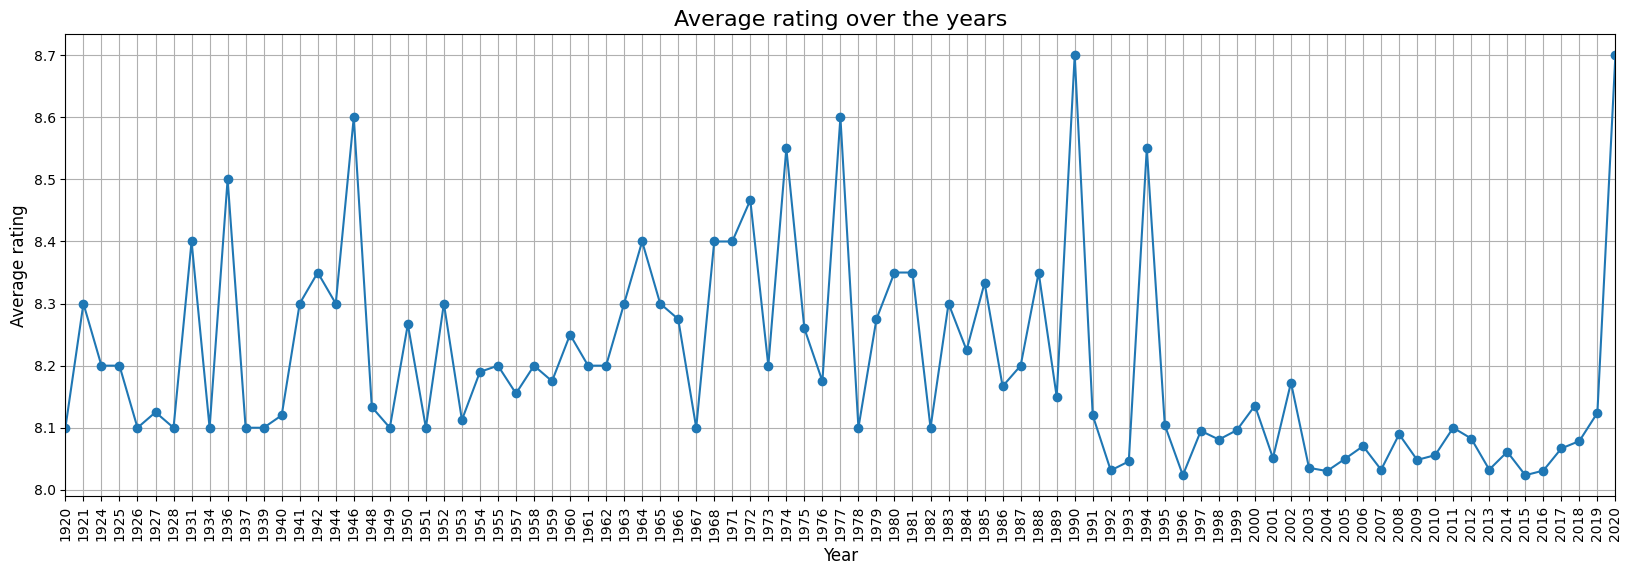

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 연도와 평균 평점 분리 (정렬 필요 → 연도가 문자열이면 int로 변환 후 정렬)
years = sorted(year_avg.keys(), key=lambda x: int(x))
avg_rates = [year_avg[y] for y in years]

# 그래프 크기를 가로 2배로 확장 (기존 10 → 20)
plt.figure(figsize=(20, 6))

# 그래프 그리기 (o 마커 표시)
plt.plot(years, avg_rates, marker='o')

# 그래프 꾸미기
plt.title("Average rating over the years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average rating", fontsize=12)

# x축 눈금: 1년 단위 (라벨은 5년 단위만 표시)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))   # 1년 단위 눈금
plt.xticks(years, rotation=45)
plt.xticks(rotation=90)  # 기울여서 겹침 방지
plt.margins(x=0)   # x축 여백 제거
plt.grid(True)

plt.show()

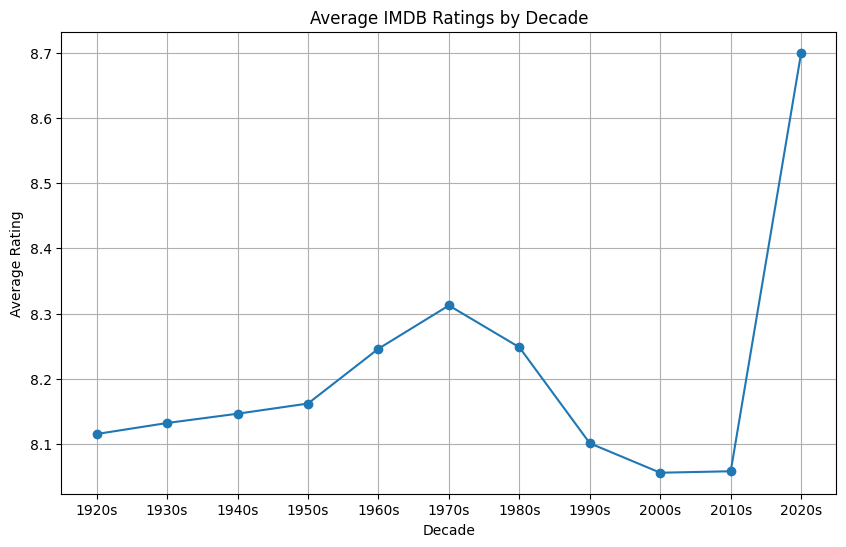

In [31]:
import matplotlib.pyplot as plt
# 연대(10년 단위) 컬럼 생성
df["Decade"] = df["Released_Year"] // 10 * 10

# 연대별 평균 평점 계산
decade_avg = df.groupby("Decade")["Rate"].mean()

# 그래프 그리기
ax = decade_avg.plot(kind="line", marker="o", figsize=(10,6))

plt.title("Average IMDB Ratings by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)

# 🔑 x축을 10년 단위로 고정 + 's' 붙이기
decades = np.arange(decade_avg.index.min(), decade_avg.index.max() + 10, 10)
ax.set_xticks(decades)
ax.set_xticklabels([f"{d}s" for d in decades])

plt.show()